In [1]:
import pandas as pd
df = pd.read_csv('proccessed_data.csv')
df.head()

,Unnamed: 0,id_init,count,id,file_id,gene,project_id,case_id,sample_id,sample_type
0,0,ENSG00000012048.18,411,ENSG00000012048,0bf50119-afec-41f8-8b89-262dfb8c3a53,BRCA1,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal
1,1,ENSG00000051180.15,44,ENSG00000051180,0bf50119-afec-41f8-8b89-262dfb8c3a53,RAD51,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal
2,2,ENSG00000100462.14,2647,ENSG00000100462,0bf50119-afec-41f8-8b89-262dfb8c3a53,PRMT5,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal
3,3,ENSG00000139618.13,46,ENSG00000139618,0bf50119-afec-41f8-8b89-262dfb8c3a53,BRCA2,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal
4,4,ENSG00000166483.9,1250,ENSG00000166483,0bf50119-afec-41f8-8b89-262dfb8c3a53,WEE1,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal


In [6]:
df = df[(df['sample_type'] == 'Primary Tumor') | (df['sample_type'] == 'Solid Tissue Normal')]
df['count_log'] = df['count'].apply(lambda x: round(pd.np.log(x), 2))
df

<ipython-input-6-3d53faaf1c45>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['count_log'] = df['count'].apply(lambda x: round(pd.np.log(x), 2))


,Unnamed: 0,id_init,count,id,file_id,gene,project_id,case_id,sample_id,sample_type,count_log
0,0,ENSG00000012048.18,411,ENSG00000012048,0bf50119-afec-41f8-8b89-262dfb8c3a53,BRCA1,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal,6.02
1,1,ENSG00000051180.15,44,ENSG00000051180,0bf50119-afec-41f8-8b89-262dfb8c3a53,RAD51,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal,3.78
2,2,ENSG00000100462.14,2647,ENSG00000100462,0bf50119-afec-41f8-8b89-262dfb8c3a53,PRMT5,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal,7.88
3,3,ENSG00000139618.13,46,ENSG00000139618,0bf50119-afec-41f8-8b89-262dfb8c3a53,BRCA2,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal,3.83
4,4,ENSG00000166483.9,1250,ENSG00000166483,0bf50119-afec-41f8-8b89-262dfb8c3a53,WEE1,TCGA-BRCA,TCGA-GI-A2C8,TCGA-GI-A2C8-11A,Solid Tissue Normal,7.13
...,...,...,...,...,...,...,...,...,...,...,...
7315,7315,ENSG00000051180.15,182,ENSG00000051180,f111e198-e0af-458f-bf5c-79ce45963d44,RAD51,TCGA-PAAD,TCGA-2J-AABH,TCGA-2J-AABH-01A,Primary Tumor,5.20
7316,7316,ENSG00000100462.14,2813,ENSG00000100462,f111e198-e0af-458f-bf5c-79ce45963d44,PRMT5,TCGA-PAAD,TCGA-2J-AABH,TCGA-2J-AABH-01A,Primary Tumor,7.94
7317,7317,ENSG00000139618.13,333,ENSG00000139618,f111e198-e0af-458f-bf5c-79ce45963d44,BRCA2,TCGA-PAAD,TCGA-2J-AABH,TCGA-2J-AABH-01A,Primary Tumor,5.81
7318,7318,ENSG00000166483.9,1431,ENSG00000166483,f111e198-e0af-458f-bf5c-79ce45963d44,WEE1,TCGA-PAAD,TCGA-2J-AABH,TCGA-2J-AABH-01A,Primary Tumor,7.27


[(0, 40000)]

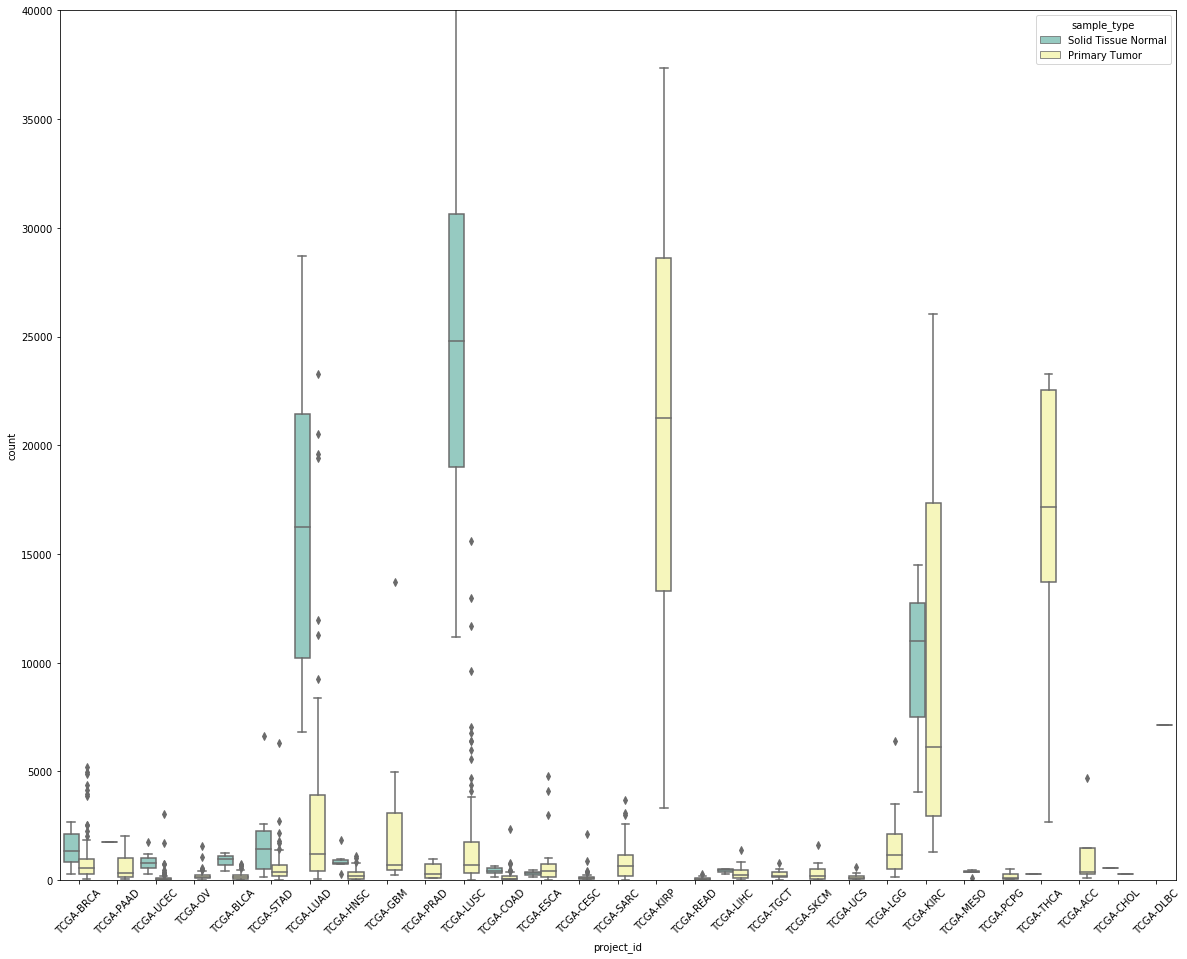

In [22]:
# show expression patterns for each gene
from matplotlib import pyplot as plt
import seaborn as sns    

gene = 'LRRK2'
plt.figure(figsize=(20,16))
plt.xticks(rotation=45)
ax = sns.boxplot(x="project_id", y="count", hue="sample_type", data=df.loc[df['gene'] == gene], palette="Set3")
ax.set(ylim=(0, 40000))